Pata guardar los resultados en csv
using CSV, DataFrames

 
# using write method
CSV.write("segundo_cuadrante_primera_prueba.csv", DataFrame(primero_segundo_cuadrante),
                         header = false)      

#la siguiente función es con la que se a generado el fractal
function condicion2(θ_1,θ_2)
    #definimos una matriz de ceros que iremos modificando acorde a los colores del fractal
    valores = zeros(length(θ_2),length(θ_1))
    #Tiempo para resolver las ecuaciones difenciales
    tiempo1 = collect(0:0.01:10000) #collect(0:0.001:11)
    
    #ciclo para analizar organizadamente cada combinación de pares de angulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #iniciamos excluyendo los ángulos que sabemos que podrán dar vuelta los pendulos
            if angulos_excluidos(θ_1[i], θ_2[j]) == false
                #definimos que para estos ángulos el elemento en la malla valga 1
                valores[j,i] = 1
            #para los ángulos que quizá si den vuelta 
            elseif angulos_excluidos(θ_1[i], θ_2[j]) == true
                #obtenemos la solución
               solucion =  RK_4(EDO_pendulo_doble, [θ_1[i],θ_2[j], 0,0], tiempo1)
                #ocupamos la función que nos permite saber si el elemento ha dado vuelta en un tiempo máximo de 10 unidades
                if vuelta(solucion[:,2])==true
                    #y se toma el valor de ese elemento en la malla como 2
                    valores[j,i] = 2
                end
            end
        end
    end
    #se regresa la malla que son los valores que se graficaran
    return valores
end

<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1> Laboratorio de Física Contemporánea II </h1>
 <h2> Péndulo doble </h2>
 <h3>Autor: Aquino Chapa Martha Abril<h3>
 </div>
 
 Hecho en Julia 🔴🟢🟣 

In [ ]:
#Paqueterías que se usarán
using Plots
using Statistics

In [ ]:
#Se definen las constantes del problema
#Masa
m = 1
#valor de la gravedad
g = 1
#Longitud de los péndulos
l = 1;

El algoritmo que se utilizará para resolver el sistema de ecuaciones diferencias es el método Runge-Kutta de cuarto orden, por lo cual se crea una función la cual reciba otra función que determine el sistema de ecuaciones diferenciales, las condiciones iniciales y el tiempo para el cual se vaya a resolver el sistema.

In [ ]:
function RK_4(edo,x_ini,t,ω²=1)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(t[i], sol[i,:], ω²)
        k2 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k1, ω²)
        k3 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k2 , ω²)
        k4 = edo( t[i] + δ, sol[i,:] .+ δ.*k2, ω²)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

Se crea ahora una función la cual regrese los valores del sistema de ecuaciones diferenciales general:

In [8]:
function EDO_pendulo_doble(t,variables,ω² = 1)
    # alpha = \theta1-\theta2
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

EDO_pendulo_doble (generic function with 2 methods)

Para determinar si el método Runge Kutta creado es funcional se obtendrá la solución al pendulo doble para ángulos pequeños con la finalidad de comparar la solución númerica y la solución analítica.

In [ ]:
#variables = [θ1, θ2, p1,p2]
function EDO_pendulo_doble_angulos_pequeños(t,variables,ω²) 
    m = 1
    l = 1
    dθ1 = (12/(7*m*l^2))*variables[3] - (18/(7*m*l^2))*variables[4]
    dθ2 = (48/(7*m*l^2))*variables[4] - (18/(7*m*l^2))*variables[3]
    dp1 = -(3/2)*m*(l^2)*ω²*variables[1]
    dp2 = -(1/2)*m*(l^2)*ω²*variables[2]
    return [dθ1,dθ2,dp1,dp2]
end

In [ ]:
#Tiempo para el cual se obtendrán las soluciones
tiempo_1 = collect(0:0.0001:30)
#solución númerica considerando el sistema de ecuaciones diferenciales con las aproximaciones
soluciones_numericas_con_aproximacion = RK_4(EDO_pendulo_doble_angulos_pequeños, [0.01,0.01, 0,0], tiempo_1,1);
#Solución númerica considerando las ecuaciones diferenciales generales
soluciones_numericas = RK_4(EDO_pendulo_doble, [0.01,0.01, 0,0], tiempo_1,1);

In [ ]:
#Solución analítica
θ_1 = []
θ_2 = []
for t in tiempo_1
    push!(θ_1,
         2*(2.18882)* (12875750/46188059293)* cos(2.29517*t)+2*(1.19636)*(169478750/46188059293)*cos(0.855695*t)       
        )
    push!(θ_2, 
        -2*(4.59033)* (12875750/46188059293)* cos(2.29517*t)+2*(1.71139)*(169478750/46188059293)*cos(0.855695*t)    
        )
    end;


In [ ]:
plot(tiempo_1,soluciones_numericas_con_aproximacion[:,1], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot!(tiempo_1, θ_1, label = "Solución analítica", linewidth = 2.5)
plot!(tiempo_1,soluciones_numericas[:,1], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot!(title = "Comparacines de sokuciones para θ₁", xlabel = "Tiempo", ylabel = "θ₁")

In [ ]:
plot(tiempo_1,soluciones_numericas_con_aproximacion[:,2], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot!(tiempo_1, θ_2, label = "Solución analítica", linewidth = 2.5)
plot!(tiempo_1,soluciones_numericas[:,2], label = "Solución númerica con aproximación", linewidth = 2.5)#color = :black)
plot!(title = "Comparacines de sokuciones para θ₂", xlabel = "Tiempo", y_label = "θ₂")

para tiempo_1 = collect(0:0.0001:30)

La diferencia máxima (para θ₁) considerando la ecuación diferencial aproximada es:  2.0589532292135393e-7

siendo el error porcentual promedio: 0.00227672445295688% 

La diferencia máxima (para θ₁) considerando la ecuación diferencial general es:  1.4272353750131254e-6

siendo el error porcentual promedio: 0.04719245149445637% 

La diferencia máxima (para θ₂) considerando la ecuación diferencial aproximada es:  4.2806300241515077e-7

siendo el error porcentual promedio: 0.0007184025507861713% 

La diferencia máxima (para θ₂) considerando la ecuación diferencial general es:  2.0403255086166167e-6

siendo el error porcentual promedio: 0.011902697748276346% 


Ahorar obtenemos las diferencias máximas entre la solución analítica y las soluciones númericas.

In [ ]:
δθ1_aproximacion_numerica = maximum(θ_1.-soluciones_numericas_con_aproximacion[:,1])
#calculando el error porcentual promedio
δθ1_aproximacion_numerica_porcentual = abs(mean(100*(θ_1.-soluciones_numericas_con_aproximacion[:,1])./θ_1))
print("La diferencia máxima (para θ₁) considerando la ecuación diferencial aproximada es:  ", δθ1_aproximacion_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_aproximacion_numerica_porcentual, "% \n")

δθ1_numerica = maximum(θ_1.-soluciones_numericas[:,1])
δθ1_numerica_porcentual = abs(mean(100*(θ_1.-soluciones_numericas[:,1])./θ_1))
print("La diferencia máxima (para θ₁) considerando la ecuación diferencial general es:  ", δθ1_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_numerica_porcentual, "% \n")

δθ2_aproximacion_numerica = maximum(θ_2.-soluciones_numericas_con_aproximacion[:,2])
δθ2_aproximacion_numerica_porcentual = abs(mean(100*(θ_2.-soluciones_numericas_con_aproximacion[:,2])./θ_2))
print("La diferencia máxima (para θ₂) considerando la ecuación diferencial aproximada es:  ", δθ2_aproximacion_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ2_aproximacion_numerica_porcentual, "% \n")

δθ2_numerica = maximum(θ_2.-soluciones_numericas[:,2])
δθ1_numerica_porcentual = abs(mean(100*(θ_2.-soluciones_numericas[:,2])./θ_2))
print("La diferencia máxima (para θ₂) considerando la ecuación diferencial general es:  ", δθ2_numerica, "\n")
print("siendo el error porcentual promedio: ", δθ1_numerica_porcentual, "% \n")


### Graficando las curvas de Lissajous

In [ ]:
plot(soluciones_numericas[:,1], soluciones_numericas[:,2], xlabel = "θ₁", ylabel = "θ₂", label = false)
plot!(soluciones_numericas_con_aproximacion[:,1], soluciones_numericas_con_aproximacion[:,2], xlabel = "θ₁", ylabel = "θ₂",
    label = false)#, linewidth = 2.5)
plot!(θ_1,θ_2, style = :dash, linewidth = 2.5 , label = "Analítica")

### Calculando las soluciones ahora para una frecuencia en los racionales y otra en los irracionales.

In [ ]:
plot(soluciones_numericas[:,1], soluciones_numericas[:,3], style = :dash, xlabel = "θ_1", ylabel = "p₁")

In [ ]:
plot(soluciones_numericas[:,2], soluciones_numericas[:,4], style = :dash, xlabel = "θ₂", ylabel = "p₂")

In [ ]:
#Obteniendo lo anterior para ahora con frecuencias racionales
l = 1/0.5
soluciones_numericas_w_in_Q = RK_4(EDO_pendulo_doble, [0.01,0.01, 0,0], collect(0:0.01:1000),0.5);
plot(soluciones_numericas_w_in_Q[:,1], soluciones_numericas_w_in_Q[:,2], xlabel = "θ₁", ylabel = "θ₂")

In [ ]:
l = 1/(π/8)
soluciones_numericas_w_no_in_Q = RK_4(EDO_pendulo_doble, [0.01,0.01, 0,0], collect(0:0.01:1000),π/8);
plot(soluciones_numericas_w_no_in_Q[:,1], soluciones_numericas_w_no_in_Q[:,2], xlabel = "θ₁", ylabel = "θ₂")

In [ ]:
plot(soluciones_numericas_w_in_Q[:,1], soluciones_numericas_w_in_Q[:,2], xlabel = "θ₁", ylabel = "θ₂", label = "ω racional")
plot!(soluciones_numericas_w_no_in_Q[:,1], soluciones_numericas_w_no_in_Q[:,2], xlabel = "θ₁", ylabel = "θ₂", label = "ω no racional")

In [ ]:
plot(soluciones_numericas_w_in_Q[:,1], soluciones_numericas_w_in_Q[:,3], xlabel = "θ₁", ylabel = "P₁" ,
                label = "ω en Q", ylim = [-0.05,0.05])
plot!(soluciones_numericas_w_no_in_Q[:,1], soluciones_numericas_w_no_in_Q[:,3], xlabel = "θ₁", ylabel = "P₁" ,
                label = "ω no en Q", ylim = [-0.09,0.09])

In [ ]:
plot(soluciones_numericas_w_in_Q[:,2], soluciones_numericas_w_in_Q[:,4], xlabel = "θ₂", ylabel = "p₂" ,
                label = "ω en Q", ylim = [-0.05,0.05])
plot!(soluciones_numericas_w_no_in_Q[:,2], soluciones_numericas_w_no_in_Q[:,4], xlabel = "θ₁", ylabel = "P₁" ,
                label = "ω no en Q", ylim = [-0.05,0.05])

## Empezando a generar el fractal para cuando el péndulo da vuelta

In [ ]:
#la siguiente función determina la distancia mayor entre elementos de una red
function diferencias(x)
    #arreglo de ceros
    diferencias = zeros(length(x)-1)
    #entre cada elemento del arreglo se determina la diferencia
    for i in 1:length(x)-1
       diferencias[i] = x[i+1] - x[i] 
    end
    #se regresa el valor máximo de las diferencias
    return abs(mean(diferencias)
end

In [ ]:
#La siguiente función determinará si el péndulo gira
#Para ello se considera que los puntos de la solución son bien portados
#Puede que exista un problema en dado caso que pi se encuentre cerca de los picos de los ángulo
function vuelta(x)
    #se obtiene la diferencia mayor entre los elementos de la red x
    
    #arreglo de ceros
    diferencias = zeros(length(x)-1)
    #entre cada elemento del arreglo se determina la diferencia
    for i in 1:length(x)-1
       diferencias[i] = x[i+1] - x[i] 
    end
    #se regresa el valor máximo de las diferencias
    ϵ = abs(mean(diferencias))

    #El contador contará cuantos elementos hay alrededor de pi, considerando una vecinidad de radio 2*la diferencia mayor
    #entre elementos en la res
    contador = 0
    #Se obtiene que elementos si están alrededor de pi 
    #quizá podría implementarse que la vecindad sea de epsilon
    for i in x
        if abs(π-abs(i)) < ϵ
            contador +=1
        else contador +=0
        end
    end
    #si hay elementos alrededor de pi se regresa un verdadero
    if contador >0
        return true
    elseif contador==0
        return false
    end
end

In [ ]:
#Esta solución da una vuelta para el ángulo 2 por ello se usa como prueba
diferencias( RK_4(EDO_pendulo_doble, [2.0 ,2.0, 0,0],  collect(0:0.01:10)))

In [ ]:
vuelta(soluciones[:,2])

In [ ]:
#esta función determina si los ángulos que se están tomando pueden que permita que se vuelta
function angulos_excluidos(θ1,θ2)
   if  3*cos(θ1) + cos(θ2) <= 2
        return true
    else return false
    end
end

In [ ]:
#la siguiente función es con la que se a generado el fractal
#Tiempo para resolver las ecuaciones difenciales
tiempo = collect(0:0.01:10000)

#Calculo los indices para los conjuntos de tiempo
#para ello se uso inicialmente 
#indexin(10, tiempo1)
indice_t10 = indexin(10, tiempo)  
indice_t100 = indexin(100, tiempo)
indice_t1000 = indexin(1000, tiempo)
indice_t10000 = indexin(10000, tiempo)

function condicion2(θ_1,θ_2)
    #definimos una matriz de ceros que iremos modificando acorde a los colores del fractal
    valores = zeros(length(θ_2),length(θ_1))
    #ciclo para analizar organizadamente cada combinación de pares de angulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #### Excluimos los ángulos
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                valores[j,i] = 1
            else 
                #obtenemos la solución con dichas soluciones iniciales
                solucion = zeros( length(tiempo) , 4 )
                solucion[1,:] .= [θ_1[i],θ_2[j],0,0]
                δ = tiempo[2]-tiempo[1]
                for i in 1:length(tiempo)-1
                    k1 = EDO_pendulo_doble(tiempo[i], solucion[i,:])
                    k2 = EDO_pendulo_doble(tiempo[i] + 0.5*δ, solucion[i,:] .+ 0.5*δ.*k1)
                    k3 = EDO_pendulo_doble(tiempo[i] + 0.5*δ, solucion[i,:] .+ 0.5*δ.*k2 )
                    k4 = EDO_pendulo_doble(tiempo[i] + δ, solucion[i,:] .+ δ.*k2)
                    solucion[i+1,:] .= solucion[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
                end
                
                #obtenemos el promedio entre las diferencias entre puntos
                #arreglo de ceros
                diferencias_1 = zeros(length(solucion[:,1])-1)
                diferencias_2 = zeros(length(solucion[:,1])-1)
                #entre cada elemento del arreglo se determina la diferencia
                for i in 1:length(solucion[:,1])-1
                diferencias_1[i] = solucion[i+1,1] - solucion[i,1] 
                diferencias_2[i] = solucion[i+1,2] - solucion[i,2] 
                end
                #se regresa el valor máximo de las diferencias
                ϵ_1 = abs(mean(diferencias_1))
                ϵ_2 = abs(mean(diferencias_2))
                
                #viendo si alguno de los péndulos da vuelta
                
                #vuelta para el primer conjto de tiempo
                contador_1 = 0
                #vueltas para el segundo cjto de tiempo
                contador_2 = 0
                #vueltas para el tercer cjto de tiempo
                contador_3 = 0
                
                #Contando cuantos flips da
                for i in 1:1002
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_1 += 1
                    end
                end
                   
                for i in 10001:100001
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_2 += 1
                    end
                end
                
                for i in 100001:1000001
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_3 += 1
                    end
                end

                #Ocupamos la función que nos permite saber si el elemento ha dado vuelta en un tiempo 
                #veamos si la solución da vuelta de 0 a 10 unidades
                if contador_1 > 0
                    #y se toma el valor de ese elemento en la malla como 2
                    valores[j,i] = 2
                
                #ahora veamos si da la vuelta de 100 a 1000
                elseif contador_2 > 0
                    valores[j,i] = 3
                #ahora veamos si da vuelta entre 1000 y 10000
                elseif contador_3 >0
                    valores[j,i] = 4
                end
                
            end
        end
    end
    #se regresa la malla que son los valores que se graficaran
    return valores
end

In [ ]:
indice_t10 = indexin(10, tiempo)  
indice_t100 = indexin(100, tiempo)
indice_t1000 = indexin(1000, tiempo)
indice_t10000 = indexin(10000, tiempo)
tiempo[1000001
]

In [ ]:
using Statistics

In [ ]:
@time begin
valores = condicion2(collect(0:0.01:2),collect(1:0.01:3))
end

In [ ]:
heatmap(valores)

In [ ]:
using CSV, DataFrames

 
# using write method
CSV.write("primer_cuadrante_prueba3.csv", DataFrame(valores),
                         header = false)      

Para la primera prueba de obtención del fractal cuando el tiempo de giro se encuentra a menos de 10 unidades de tiempo se uso que la malla de ángulo era

angulo_1 = collect(0:0.01:π)

angulo_2 = collect(0:0.01:π)

es decir 315x315 la malla para los ángulos 99225 elementos en total.

Así mismo, para resolver las ecuaciones diferenciales se uso la siguiente malla de tiempo 

collect(0:0.001:11)

que acorde al algorithmo Runge-Kutta el error de la solución es del orden de 10^{-12}.


In [ ]:
segundo_cuadrante_1 = CSV.read("segundo_cuadrante_primera_prueba.csv", DataFrame)
primer_cuadrante_1 = CSV.read("primer_cuadrande_primera_prueba.csv", DataFrame)

#convertimos los datos a una matriz para poder gráficarlos
primero = Matrix(primer_cuadrante_1)
segundo = Matrix(segundo_cuadrante_1)
#Los tamaños del cuarto y tercer cuadrante deben ser iguales a los de sus respectivos cuadrantes
cuarto_cuadrante = zeros(314,315)
tercer_cuadrante = zeros(314,316)

for i in 0:length(segundo)-1
    tercer_cuadrante[i+1] = segundo[end-i]
end

for i in 0:length(primero)-1
    cuarto_cuadrante[i+1] = primero[end-i]
end

#unimos en dos trozos los cuatro cuadrantes
tercero_cuarto = hcat(cuarto_cuadrante , tercer_cuadrante)
primero_segundo = hcat(segundo,primero )

#unimos todo el fractal
fractal = vcat(tercero_cuarto, primero_segundo)


In [ ]:
using Plots
using DataFrames
using CSV
fractal = CSV.read("fractal_prueba1.csv", DataFrame)

#convertimos los datos a una matriz para poder gráficarlos
primero = Matrix(fractal)
heatmap(primero)

In [ ]:
#intentando implementar rk con pasos adaptivos

function RK_4(edo,x_ini,t,ω²=1)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(t[i], sol[i,:], ω²)
        k2 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k1, ω²)
        k3 = edo(t[i] + 0.5*δ, sol[i,:] .+ 0.5*δ.*k2 , ω²)
        k4 = edo( t[i] + δ, sol[i,:] .+ δ.*k2, ω²)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end


## Analizando las cosas con el tiempo de latigazo

In [ ]:
#listas de momentos 
function latigazo(p_1,p_2)
    producto = p_1.*p_2
    latigazo_contador = 0
    for i in producto
        if i<0
            latigazo_contador +=1
        end
    end
    return latigazo_contador
end

In [ ]:
#la siguiente función es con la que se a generado el fractal para el latizago
function condicion3(θ_1,θ_2)
    #definimos una matriz de ceros que iremos modificando acorde a los colores del fractal
    valores = zeros(length(θ_2),length(θ_1))
    #Tiempo para resolver las ecuaciones difenciales
    tiempo1 = collect(0:0.01:11)
    
    #ciclo para analizar organizadamente cada combinación de pares de angulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            solucion =  RK_4(EDO_pendulo_doble, [θ_1[i],θ_2[j], 0,0], tiempo1)
            
            if latigazo(solucion[:,3],solucion[:,4]) !=0 
                    #y se toma el valor de ese elemento en la malla como 2
                    valores[j,i] = 1
            end
        end
    end
    #se regresa la malla que son los valores que se graficaran
    return valores
end

In [26]:
function EDO_pendulo_doble(t,variables,ω² = 1)
    # alpha = \theta1-\theta2
    l = 1
    m = 1
    α = variables[1]-variables[2]
    dθ_1 = 6/(m*l^2)*(2*variables[3]-3*variables[4]*cos(α))/(16-9*(cos(α))^2)
    dθ_2 = 6/(m*l^2)*(8*variables[4]-3*cos(α)*variables[3])/(16-9*(cos(α))^2)
    dp_1 = -1/2*(m*l^2)*(dθ_1*dθ_2*sin(α)+3*ω²*sin(variables[1]) )
    dp_2 = -1/2*(m*l^2)*(-dθ_1*dθ_2*sin(α) + ω²*sin(variables[2]))
    
    return[dθ_1, dθ_2, dp_1, dp_2]
end

EDO_pendulo_doble (generic function with 2 methods)

In [90]:
function generador_fractal(θ_1, θ_2, t_0, t_f, δ, ϵ)
   #matriz de ceros donde se aneará si el angulo da vuelta o no
    valores = zeros(length(θ_1), length(θ_2))
    
    #ciclo para barrer en todos los ángulos
    for i in 1:length(θ_1)
        for j in 1:length(θ_2)
            #empezamos a descartar los ángulos que sabemos que no giraran
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                valores[j,i] = 1
            
            #para los valores que sabemos que van a girar
            else
                solucion_t_1 = [θ_1[i], θ_2[j],0,0]
                t_1 = t_0
                #buscamos el elemento de la solución tal que este alrededor de una vecindad epsilon de π
                while abs(abs(solucion_t_1[1])-π) > ϵ #
                    t_1 = t_1 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_1 = EDO_pendulo_doble(t_1, solucion_t_1)
                    k2_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1 .+ 0.5*δ.*k1_1)
                    k3_1 = EDO_pendulo_doble(t_1 + 0.5*δ, solucion_t_1.+ 0.5*δ.*k2_1 )
                    k4_1 = EDO_pendulo_doble(t_1 + δ, solucion_t_1.+ δ.*k2_1)
                    solucion_t_1 = solucion_t_1 .+ (δ/6.0).*(k1_1 .+ 2.0.*k2_1 .+ 2.0.*k3_1 .+ k4_1)
                    if t_1 > t_f
                        break
                    end
                end
                
                solucion_t_2 = [θ_1[i], θ_2[j],0,0]
                t_2 = t_0
                while abs(abs(solucion_t_2[2])-π) > ϵ 
                    t_2 = t_2 + δ
                #obtenemos la solución del siguiente tiempo
                    k1_2 = EDO_pendulo_doble(t_2, solucion_t_2)
                    k2_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2 .+ 0.5*δ.*k1_2)
                    k3_2 = EDO_pendulo_doble(t_2 + 0.5*δ, solucion_t_2.+ 0.5*δ.*k2_2)
                    k4_2 = EDO_pendulo_doble(t_2 + δ, solucion_t_2.+ δ.*k2_2)
                    solucion_t_2 = solucion_t_2 .+ (δ/6.0).*(k1_2 .+ 2.0.*k2_2 .+ 2.0.*k3_2 .+ k4_2)
                    if t_2 > t_f
                        break
                    end
                end
                
                
                if abs(abs(solucion_t_1[1])-π) < ϵ 
                    if t_1 <= 10
                        valores[j,i] = 2
                    elseif 100 <= t_1 <= 1000
                        valores[j,i] = 3
                    elseif 1000 <=  t_1 <= 10000
                        valores[j,i] = 4
                    end        
                end
                
                
                if abs(abs(solucion_t_2[2])-π) < ϵ 
                    if t_2 <= 10
                        valores[j,i] = 2
                    elseif 100 <= t_2 <= 1000
                        valores[j,i] = 3
                    elseif 1000 <=  t_2 <= 10000
                        valores[j,i] = 4
                    end
                end
               
                
            end
        end
    end
    return valores
    
end

generador_fractal (generic function with 1 method)

In [91]:
 solucion_t = [θ_1[i], θ_2[j],0,0]
                t = t_0
                
                while abs(abs(solucion_t[2])-π) > ϵ || abs(abs(solucion_t[1])-π) > ϵ #
                    t = t + δ
                #obtenemos la solución del siguiente tiempo
                    k1 = EDO_pendulo_doble(t, solucion_t)
                    k2 = EDO_pendulo_doble(t + 0.5*δ, solucion_t .+ 0.5*δ.*k1)
                    k3 = EDO_pendulo_doble(t + 0.5*δ, solucion_t.+ 0.5*δ.*k2 )
                    k4 = EDO_pendulo_doble(t + δ, solucion_t.+ δ.*k2)
                    solucion_t = solucion_t .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
                    if t > t_f
                        break
                    end
                end

LoadError: UndefVarError: θ_1 not defined

101.116484 seconds (944.44 M allocations: 98.409 GiB, 10.72% gc time)


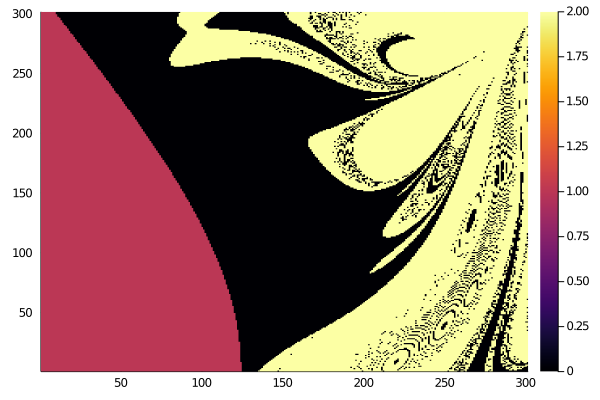

In [92]:
θ1 = collect(0:0.01:3)
θ2 = collect(0:0.01:3)

@time begin
datos = generador_fractal(θ1, θ2, 0, 10, 0.01, 0.01)
end
heatmap(datos)

 44.880241 seconds (425.68 M allocations: 44.369 GiB, 11.26% gc time)


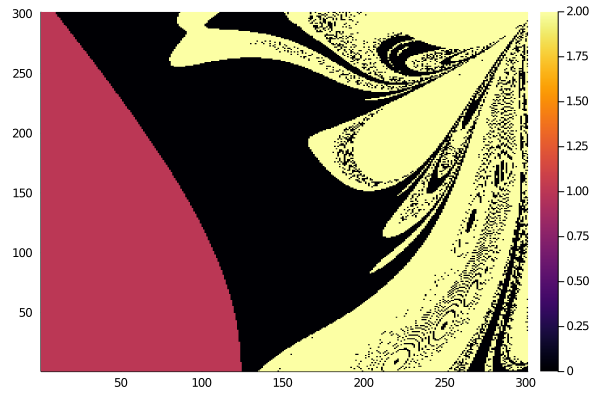

In [81]:
θ1 = collect(0:0.01:3)
θ2 = collect(0:0.01:3)
@time begin
datos = generador_fractal(θ1, θ2, 0, 10, 0.01, 0.01)
end
heatmap(datos)

In [75]:
θ1 = collect(0:0.1:3)
θ2 = collect(0:0.1:3)
@time begin
datos = generador_fractal(θ1, θ2, 0, 10, 0.01, 0.001)
end


  0.877490 seconds (6.01 M allocations: 613.568 MiB, 7.98% gc time)


31×31 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  2.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 

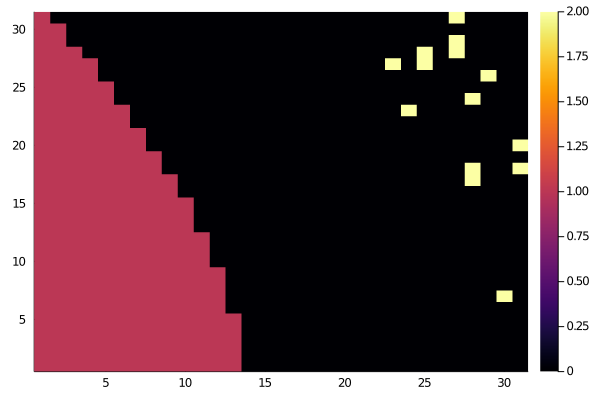

In [76]:
using Plots
heatmap(datos)

In [ ]:
diferencias( RK_4(EDO_pendulo_doble, [2.0 ,2.0, 0,0],  collect(0:0.01:10)))

In [ ]:
            if 3*cos(θ_1[i]) + cos(θ_2[j]) > 2
                valores[j,i] = 1
            else 
                #obtenemos la solución con dichas soluciones iniciales
                solucion = zeros( length(tiempo) , 4 )
                solucion[1,:] .= [θ_1[i],θ_2[j],0,0]
                δ = tiempo[2]-tiempo[1]
                for i in 1:length(tiempo)-1
                    k1 = EDO_pendulo_doble(tiempo[i], solucion[i,:])
                    k2 = EDO_pendulo_doble(tiempo[i] + 0.5*δ, solucion[i,:] .+ 0.5*δ.*k1)
                    k3 = EDO_pendulo_doble(tiempo[i] + 0.5*δ, solucion[i,:] .+ 0.5*δ.*k2 )
                    k4 = EDO_pendulo_doble(tiempo[i] + δ, solucion[i,:] .+ δ.*k2)
                    solucion[i+1,:] .= solucion[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
                end
                
                #obtenemos el promedio entre las diferencias entre puntos
                #arreglo de ceros
                diferencias_1 = zeros(length(solucion[:,1])-1)
                diferencias_2 = zeros(length(solucion[:,1])-1)
                #entre cada elemento del arreglo se determina la diferencia
                for i in 1:length(solucion[:,1])-1
                diferencias_1[i] = solucion[i+1,1] - solucion[i,1] 
                diferencias_2[i] = solucion[i+1,2] - solucion[i,2] 
                end
                #se regresa el valor máximo de las diferencias
                ϵ_1 = abs(mean(diferencias_1))
                ϵ_2 = abs(mean(diferencias_2))
                
                #viendo si alguno de los péndulos da vuelta
                
                #vuelta para el primer conjto de tiempo
                contador_1 = 0
                #vueltas para el segundo cjto de tiempo
                contador_2 = 0
                #vueltas para el tercer cjto de tiempo
                contador_3 = 0
                
                #Contando cuantos flips da
                for i in 1:1002
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_1 += 1
                    end
                end
                   
                for i in 10001:100001
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_2 += 1
                    end
                end
                
                for i in 100001:1000001
                   if abs(π-abs(solucion[i,1])) <= ϵ_1 || abs(π-abs(solucion[i,2]))<= ϵ_2
                        contador_3 += 1
                    end
                end

                #Ocupamos la función que nos permite saber si el elemento ha dado vuelta en un tiempo 
                #veamos si la solución da vuelta de 0 a 10 unidades
                if contador_1 > 0
                    #y se toma el valor de ese elemento en la malla como 2
                    valores[j,i] = 2
                
                #ahora veamos si da la vuelta de 100 a 1000
                elseif contador_2 > 0
                    valores[j,i] = 3
                #ahora veamos si da vuelta entre 1000 y 10000
                elseif contador_3 >0
                    valores[j,i] = 4
                end
                
            end
        end
    end
    #se regresa la malla que son los valores que se graficaran
    return valores
end

In [ ]:
using Plots
using DataFrames
using CSV

prueba = CSV.read("primer_cuadrante_prueba2.csv", DataFrame);

fractal = Matrix(prueba)
heatmap(fractal)

In [ ]:
prueba2 = CSV.read("fractal_prueba1.csv", DataFrame);

fractal = Matrix(prueba)
heatmap(fractal)